## Contributors: 
Neal Friesenhahn

### Importing Libraries:

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import math
import numpy as np
from sklearn.metrics import classification_report

from amb_sdk.sdk import DarwinSdk

### Configure Darwin:

In [2]:
# Login
ds = DarwinSdk()
file = open("login.txt", "r")
username = file.readline(0)
password = file.readline(1)
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('username', 'password')
if not status:
    print(msg)
    

#### Data Path
Make sure to set this to your local machine's path to the data.

In [3]:
path = './'

### Importing Data:
Data used in this project:
https://data.austintexas.gov/Building-and-Development/Issued-Construction-Permits/3syk-w9eu

In [4]:
dataFile = "./Issued_Construction_Permits.csv"
trainName= "train.csv"
testName = 'test.csv'
cleanName= "cleaned.csv"
data = pd.read_csv(dataFile, skipinitialspace=True)

#Columns with detected mixed types
mixedData_col = [52,54,56,58,59,60,61,62,63,64,65,66]

columnsNames = data.columns.values
#excess labels included in feature drop
#Darwin doesn't like mulitple date fields either so they must be dropped as well
#Can't one-hot encode descriptions and Darwin can't process them either, thus they are dropped as well, including Addresses
featureDrop = ['Permit Type Desc', 'Permit Num', 'Permit Class', 'Contractor Trade', 'Applied Date', 
               'Issued Date', 'Status Date', 'Expires Date', 'Completed Date', 'Plumbing Valuation', 'Plumbing Valuation Remodel',
               'Electrical Valuation', 'Electrical Valuation Remodel', 'Mechanical Valuation', 'Mechanical Valuation Remodel',
               'MedGas Valuation', 'MedGas Valuation Remodel', 'Project ID', 'Issuance Method', 'Issued In Last 30 Days',
               'Property Legal Description', 'Description']
#add mixed datatype col to feature drop until later date of processing 
print("Removed mixed data columns from dataset:")
for col in mixedData_col:
    print(columnsNames[col])
    featureDrop.append(columnsNames[col])

#reduce dimensionality and remove excess labels
fullData = data.drop(featureDrop, axis=1)

#pick sample sizes (max is half the dataset due to Darwin restrictions on Big Data)
trainSize = math.floor(len(fullData)/2)
testSize = math.floor(len(fullData)/10)

#assumption here is that entries will be added to dataset with a random distribution and thus only the index of the 
#record could act as a chronological bias, but otherwise sufficently random. 
testSet = fullData.head(testSize)
trainData = fullData.tail(trainSize)

#write out datasets to disk to upload later
testSet.to_csv(os.path.join(path, testName))
trainData.to_csv(os.path.join(path, trainName))

#show data / completed write to disk
trainData.head()

C:\Users\Neal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (52,54,56,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Removed columns from dataset:
Contractor Company Name
Contractor Phone
Contractor Address 2
Contractor Zip
Applicant Full Name
Applicant Organization
Applicant Phone
Applicant Address 1
Applicant Address 2
Applicant City
Applicant Zip
Certificate Of Occupancy


,Permit Type,Permit Class Mapped,Work Class,Condominium,Project Name,Description,TCAD ID,Property Legal Description,Day Issued,Calendar Year Issued,...,Jurisdiction,Link,Master Permit Num,Latitude,Longitude,Location,Contractor Full Name,Contractor Address 1,Contractor City,Total Lot SQFT
949267,MP,Residential,New,No,12509 Mexicana Cv,New Sf Residence W Attached Garage Cov'D Porch...,0330400231,LOT 23 BLK B LOS CIELOS SEC 1,THURSDAY,2005,...,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,716347.0,30.169626,-97.627192,"(30.16962574, -97.62719172)",NaN,NaN,Austin,NaN
949268,MP,Residential,New,No,1921 Bird Call Pass,New 1 Sty Sf Residence WAtt Garage Cvd PorchPatio,0245300804,LOT 9 BLK P PIONEER CROSSING WEST SEC 6,WEDNESDAY,2005,...,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,716348.0,30.371681,-97.652043,"(30.37168068, -97.65204275)",NaN,"6500 RIVER PLACE BLVD BLDG 2, #300",AUSTIN,NaN
949269,MP,Residential,New,No,12845 Buenos Aires Pkwy,New Sf Residence W Attached Garage Cov'D Porch...,0330431208,LOT 12 BLK P LOS CIELOS SEC 1,FRIDAY,2005,...,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,716349.0,30.167240,-97.622324,"(30.16723992, -97.62232383)",NaN,NaN,Austin,NaN
949270,MP,Residential,New,No,12608 Campana Dr,New Sf Residence W Attached Garage Cov'D Porch...,0330400215,LOT 39 BLK B LOS CIELOS SEC 1,MONDAY,2005,...,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,716350.0,30.168743,-97.626033,"(30.16874311, -97.62603259)",NaN,NaN,Austin,NaN
949271,MP,Residential,New,No,1105 Mooreland Dr,New Sf Residence W Attached Garage Cov'D Porch...,0438231011,LOT 6 BLK D CHAPPELL HILL,WEDNESDAY,2005,...,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,716351.0,30.150324,-97.828910,"(30.15032383, -97.82891041)",NaN,5716 W US 290 HWY SUITE 205,Austin,NaN


In this dataset we will attempt to use the Permit Type as the class label for the data and because of that we need to remove some columns that also act as labels in that capacity that might skew the results. Columns that are similar to Permit type are:

    Permit Type Description (too hard to process due to variablility of descriptions, but also typically contains label name)
    Permit Num (since it contain the type in the code)
    Permit Class (functions much like a label)
    Contractor Trade (plummers typically take plumbing jobs, electricians take electrician jobs thus could act as a label)
    Project ID (applies to series of permits stored in folder in database, unsurprisingly permits are put in similar folders)

Tangental Job indicators: (subject to testing and feature engineering)

    *Plumbing Valuation
    *Plumbing Valuation Remodel
    *Electrical Valuation
    *Electrical Valuation Remodel
    *Mechanical Valuation
    *Mechanical Valuation Remodel 
    *MedGas Valuation
    *MedGas Valuation Remodel

It might be interesting to note that a renovation job might include plumbing costs and the difference being the cost threshold which decides if its specifically a plumbing job.

Interesting sidenote our data qualifies as big data under Darwin's algorithms (>500MB in size) as such not only can we sample
at most half our dataset but also the need to remove addional columns before uploading including those above.

### Upload to Darwin

In [5]:
status, dataset = ds.upload_dataset(os.path.join(path, trainName))
if not status:
    print(dataset)

#### Clean dataset

In [6]:
target = "Permit Type"
index = "Applied Date"
model = target + "_model3"
status, job_id = ds.clean_data(trainName, target = target)
print(job_id)
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'job_name': '9a3327349c834d7c9de7a628b2881189', 'artifact_name': '541eb9caf4bb4734952eebc01a1bd87d'}
{'status': 'Requested', 'starttime': '2019-04-19T19:34:52.7673', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['test10.csv'], 'artifact_names': ['541eb9caf4bb4734952eebc01a1bd87d'], 'model_name': None, 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-19T19:34:52.7673', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['test10.csv'], 'artifact_names': ['541eb9caf4bb4734952eebc01a1bd87d'], 'model_name': None, 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T19:34:52.7673', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['test10.csv'], 'artifact_names': ['541eb9caf4bb4734952eebc01a1bd87d'], 'model_name': None, 'job_error': ''}
{'status': 'Run

{'status': 'Running', 'starttime': '2019-04-19T19:34:52.7673', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['test10.csv'], 'artifact_names': ['541eb9caf4bb4734952eebc01a1bd87d'], 'model_name': None, 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T19:34:52.7673', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['test10.csv'], 'artifact_names': ['541eb9caf4bb4734952eebc01a1bd87d'], 'model_name': None, 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T19:34:52.7673', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['test10.csv'], 'artifact_names': ['541eb9caf4bb4734952eebc01a1bd87d'], 'model_name': None, 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T19:34:52.7673', 'endtime': None, 'percent_complete': 0, 'job_type': 'Clean

### Create and Train Model

In [7]:
status, job_id = ds.create_model(dataset_names = trainName, \
                                 model_name =  model, \
                                 max_train_time = '00:15')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-19T19:49:12.456071', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['test10.csv'], 'artifact_names': None, 'model_name': 'Permit Type_model10', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-19T19:49:12.456071', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['test10.csv'], 'artifact_names': None, 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T19:49:12.456071', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['test10.csv'], 'artifact_names': None, 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T19:49:12.456071', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_na

{'status': 'Running', 'starttime': '2019-04-19T19:49:12.456071', 'endtime': None, 'percent_complete': 20, 'job_type': 'TrainModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': ['test10.csv'], 'artifact_names': None, 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T19:49:12.456071', 'endtime': None, 'percent_complete': 20, 'job_type': 'TrainModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': ['test10.csv'], 'artifact_names': None, 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T19:49:12.456071', 'endtime': None, 'percent_complete': 20, 'job_type': 'TrainModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': ['test10.csv'], 'artifact_names': None, 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T19:49:12.456071', 'endtime': None, 'percent_complete': 20, 'job_type': 'TrainModel', '

#### Check status of job

In [9]:
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Complete', 'starttime': '2019-04-19T19:49:12.456071', 'endtime': '2019-04-19T20:10:01.922132', 'percent_complete': 100, 'job_type': 'TrainModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': ['test10.csv'], 'artifact_names': None, 'model_name': 'Permit Type_model10', 'job_error': ''}


### Analyze Model

In [10]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])


{'status': 'Running', 'starttime': '2019-04-19T20:10:28.678311', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': None, 'artifact_names': ['d0b9f25d4680463fbc07158e6ef2cfcf'], 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T20:10:28.678311', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': None, 'artifact_names': ['d0b9f25d4680463fbc07158e6ef2cfcf'], 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T20:10:28.678311', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': None, 'artifact_names': ['d0b9f25d4680463fbc07158e6ef2cfcf'], 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T20:10:28.678311',

Display most important features of the model.

In [11]:
feature_importance[:10]

Unnamed: 0              0.639126
Master Permit Num       0.123466
Housing Units           0.031736
Total Job Valuation     0.026536
Number Of Floors        0.026159
Calendar Year Issued    0.019575
Fiscal Year Issued      0.015977
Longitude               0.013272
Latitude                0.013131
TCAD ID                 0.012157
dtype: float64

### Predictions

#### Perform model prediction on the training dataset.

In [12]:
status, artifact = ds.run_model(trainName, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-19T20:12:08.733762', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': ['test10.csv'], 'artifact_names': ['a1af67bd1e8e4719b83df8d961133006'], 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T20:12:08.733762', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': ['test10.csv'], 'artifact_names': ['a1af67bd1e8e4719b83df8d961133006'], 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T20:12:08.733762', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': ['test10.csv'], 'artifact_names': ['a1af67bd1e8e4719b83df8d961133006'], 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19

(True, 'Job completed')

#### Download predictions from Darwin.

In [13]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,Permit Type,prob_BP,prob_DS,prob_EP,prob_MP,prob_PP
0,MP,0.0,0.0,1.027385e-35,1.0,0.000000e+00
1,MP,0.0,0.0,3.068349e-37,1.0,0.000000e+00
2,MP,0.0,0.0,7.980164e-35,1.0,1.000000e-10
3,MP,0.0,0.0,2.046852e-33,1.0,6.000000e-10
4,MP,0.0,0.0,2.391363e-39,1.0,0.000000e+00


#### (optional) Write to disk downloaded predictions

In [14]:
prediction.to_csv(os.path.join(path, "prediction10.csv"))

#### Create visualizations for comparing predictions with actual target. 

             precision    recall  f1-score   support

         BP       1.00      1.00      1.00    248227
         DS       1.00      1.00      1.00     71718
         EP       1.00      1.00      1.00    347547
         MP       1.00      1.00      1.00     40701
         PP       1.00      1.00      1.00    241074

avg / total       1.00      1.00      1.00    949267



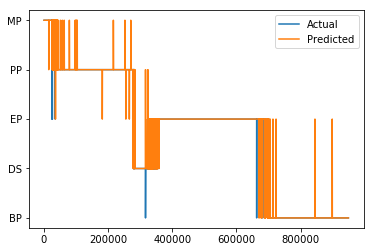

In [15]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(reduceData[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(reduceData[target], prediction[target]))

#### Perform model prediction on test dataset from holdout method.
Upload test data.

In [16]:
status, dataset = ds.upload_dataset(os.path.join(path, testName))
if not status:
    print(dataset)

Clean test data. 

In [17]:
status, job_id = ds.clean_data(testName, model_name = model)
print("Model:\n",model)
print("Target: \n",target)
print(job_id)
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

Model:
 Permit Type_model10
Target: 
 Permit Type
{'job_name': 'fc96bc2c07834349ab1c18252455dc9f', 'artifact_name': '865beb8cc7114b49aad7cbf51f64ae83'}
{'status': 'Requested', 'starttime': '2019-04-19T20:16:18.953952', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['testSet10.csv'], 'artifact_names': ['865beb8cc7114b49aad7cbf51f64ae83'], 'model_name': None, 'job_error': None}
{'status': 'Failed', 'starttime': '2019-04-19T20:16:18.953952', 'endtime': '2019-04-19T20:16:27.058564', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['testSet10.csv'], 'artifact_names': ['865beb8cc7114b49aad7cbf51f64ae83'], 'model_name': None, 'job_error': 'DarwinInternalErroruncaught'}


Run model on test dataset. 

In [18]:
status, artifact = ds.run_model(testName, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-19T20:17:05.983997', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': ['testSet10.csv'], 'artifact_names': ['b455258e25cd4de49f5c3b05b3ab38f7'], 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-19T20:17:05.983997', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': ['testSet10.csv'], 'artifact_names': ['b455258e25cd4de49f5c3b05b3ab38f7'], 'model_name': 'Permit Type_model10', 'job_error': ''}
{'status': 'Failed', 'starttime': '2019-04-19T20:17:05.983997', 'endtime': '2019-04-19T20:17:26.238989', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 1.0170252323150635, 'generations': 0, 'dataset_names': ['testSet10.csv'], 'artifact_names': ['b455258e25cd4de49f5c3b05b3ab38f7'], 'model_name': 'Permit Type_model10', 'job_error': 'FailedDownload:

(False,
 {'artifact_names': ['b455258e25cd4de49f5c3b05b3ab38f7'],
  'dataset_names': ['testSet10.csv'],
  'endtime': '2019-04-19T20:17:26.238989',
  'generations': 0,
  'job_error': 'FailedDownload: Failed to download entity of type Object from location artifacts/c5e7932c-5ca0-11e9-a3a0-5b4cadcb3bcf_865beb8cc7114b49aad7cbf51f64ae83/data.csv',
  'job_type': 'RunModel',
  'loss': 1.0170252323150635,
  'model_name': 'Permit Type_model10',
  'percent_complete': 100,
  'starttime': '2019-04-19T20:17:05.983997',
  'status': 'Failed'})

#### Create visualizations for comparing predictions with actual target.

In [ ]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
df = pd.read_csv(os.path.join(path,test_data))
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

### Darwin' Pick for machine learning model

In [19]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBClassifier', 'parameters': {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.49896774302542807, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 17, 'n_estimators': 479, 'n_jobs': -1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.05598042454166618}}


## Clean up

In [4]:
#ds.delete_all_datasets()
#ds.delete_all_models()
#ds.delete_all_artifacts()

Deleting test10.csv
Deleting testSet10.csv
Deleting Permit Type_model10
Deleting 0cad448fa6db4e20845ede356d44edd5
Error removing artifact "0cad448fa6db4e20845ede356d44edd5" - 404: NOT FOUND - {"message": "Failed to find artifact 0cad448fa6db4e20845ede356d44edd5"}

Deleting f2d6110053354e5b80ece5cdc3668918
Error removing artifact "f2d6110053354e5b80ece5cdc3668918" - 404: NOT FOUND - {"message": "Failed to find artifact f2d6110053354e5b80ece5cdc3668918"}

Deleting 7a66ffae7ce6480897a4548c8491a2be
Error removing artifact "7a66ffae7ce6480897a4548c8491a2be" - 404: NOT FOUND - {"message": "Failed to find artifact 7a66ffae7ce6480897a4548c8491a2be"}

Deleting 32cbe86816554c8b9c905cf81e59e145
Error removing artifact "32cbe86816554c8b9c905cf81e59e145" - 404: NOT FOUND - {"message": "Failed to find artifact 32cbe86816554c8b9c905cf81e59e145"}

Deleting 25f4e215e1b04071ad8c31ade0dac299
Error removing artifact "25f4e215e1b04071ad8c31ade0dac299" - 404: NOT FOUND - {"message": "Failed to find artifact

(True, None)